<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_50~86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. 딥러닝 준비


* 2019년 9월, 텐서플로 2의 주요 변화는 케라스 API의 통합
* 케라스, 프랑소와 숄레가 개발한 고수준 딥러닝 라이브러리,는 다양한 백엔드 엔진을 사용할 수 있도록 설계되었으나, 케라스 2.4 버전부터는 오직 텐서플로를 백엔드로만 지원
* 이는 케라스의 사용이 쉽고 직관적인 점을 강조하며, 복잡한 모델과 사용자 정의 훈련에는 텐서플로의 저수준 API가 필요함을 나타냄.

## 1-1 주요 용어

### 1-1-1 하이퍼파라미터(hyper-parameter)
* 딥러닝에서 말하는 하이퍼파라미터는 파이썬에서 배운 파라미터와는 다른 의미를 가짐.
* 하이퍼파라미터: 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값을 뜻함
* 모델이 훈련하면서 가중치와 편향은 자동 업데이트되고 조정되며 알아서 변하는 값들이지만, 그 외의 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값들이 매우 많음.
* 이렇게 사용자가 직접 설정해야 하는 값들을 하이퍼파라미터라고 하며, 사용자가 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라지기 때문에 매우 중요함.
* 튜닝: 하이퍼파라미터의 값을 조절하는 행위

### 1-1-2 과소적합 vs. 과대적합(underfitting vs. overfitting)
* 머신러닝 학습에 있어 데이터는 크게 훈련용 데이터와 예측용 데이터로 구분할 수 있음.
* 훈련용 데이터: 머신러닝 모델이 학습할 데이터를 말하며 training set 또는 train set이라고 줄여 말함.
* 예측용 데이터: 정답 레이블(label)이 없는 모델이 예측해야 하는 대상 데이터를 말하며 test set이라고 말함

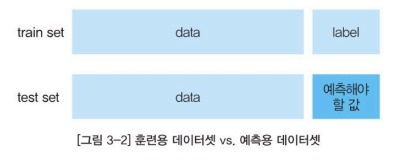

* 머신러닝에서 주어진 훈련 데이터에서 패턴 학습을 통해 모델을 완성해 나감.
* 훈련용 데이터를 반복적으로 학습하면서 모델은 사람이 발견하지 못하는 패턴을 발견하므로써 사람의 예측 성능을 뛰어 넘는 모델을 생성할 수 있음.
* 하지만 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나, 혹은 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 모델이 학습한 후 예측 성능이 현저히 떨어지게 됨.

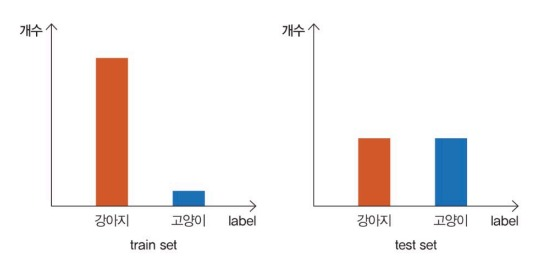

* 과소적합: 모델이 충분히 학습되지 않은 경우에 예측 성능이 떨어지는 것
* 과대적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태. 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 주어진 훈련 데이터에 대한 예측 성능이 좋지만, 정작 중요한 예측 오차가 발생할 확률이 커짐

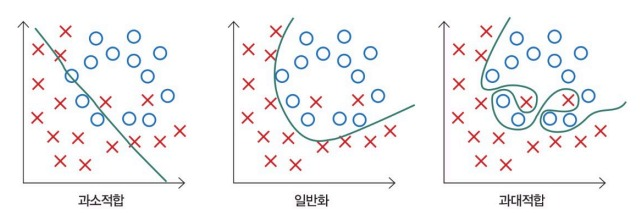

* 모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야함.
* 훈련 데이터를 잘 구성해야 하고, 예측 데이터와 분포가 동일하게 구성해야 하며 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야 함. 또한, 훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델을 결정.

### 1-1-3 에포크
* 딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복하면서 최적의 모델 가중치를 찾는 과정.
* 1 epoch: 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프
* 훈련 데이터셋을 빠짐없이 모두 1번 모델 훈련에 사용하면 1 epoch의 훈련 과정을 마치고 다음 epoch로 넘어감. 사전에 설정된 최대 epoch 횟수까지 반복적으로 진행하고 종료.
* epoch 역시 중요한 하이퍼파라미터.

### 1-1-4 손실함수(loss function)
* 손실함수: 예측 값과 정답 값의 차이 또는 오차
* 오차: 딥러닝 모델의 출력 값과 실제 값의 차이
* 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 함. 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적.
* 지도학습의 분류 문제는 이진 분류와 다중 분류로 구분할 수 있음.
 * 이진 분류 문제: "binary_crossentropy" 손실함수를 사용하며, 출력층의 활성화 함수가 "sigmoid"
 * 다중 분류 문제: "categorical_crossentropy" 손실함수를 사용하며, 다중 분류의 대상이 되는 클래스가 원핫 벡터인 경우 사용함. 정답 클래스가 원핫 인코딩이 아닌 레이블 값으로 표현되어 서로 다른 숫자로 구분되어 있으면 "sparse_categorical_crossentropy" 손실함수를 사용. 출력층의 활성함수로 "softmax"를 사용.
* 회귀 모델의 경우 평균제곱오차, 평균절대값오차, 후버 등이 사용됨
* 텐서플로는 사전 정의된 손실함수를 함수형과 클래스형으로 제공


In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

### 1-1-5 경사하강법 (gradient descent)
* 경사하강법: 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

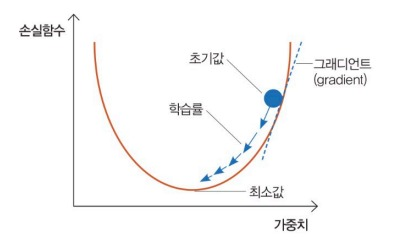

* 딥러닝 훈련 프로세스에서 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있음.
* 손실함수: Loss = $\frac{1}{2} \sum_i^{} (y-\hat{y})^2$로 정의
 * $\frac{1}{2}$는 가중치에 대한 그래디언트를 계산하기 쉽도록 추가된 상수 값
* $y = ux + b$의 수식이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현

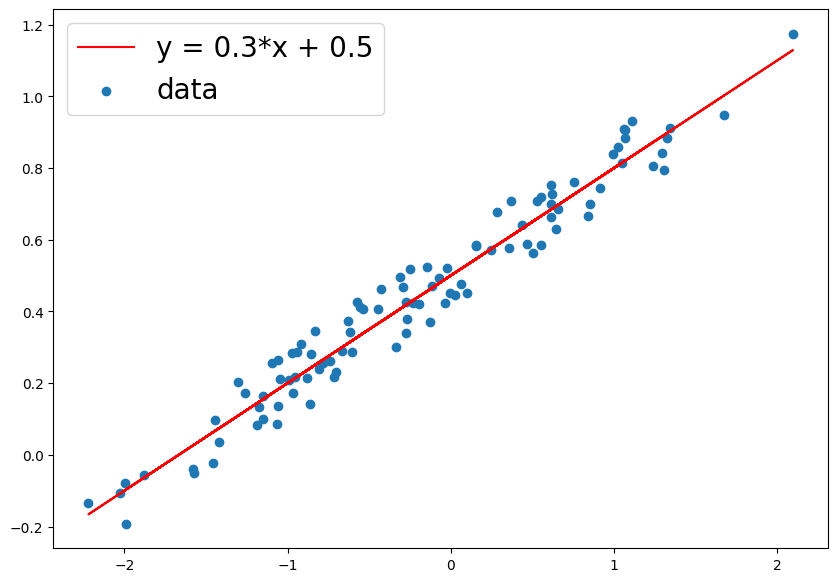

w: 0.3, b: 0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w = 0.5, b = 0.8, size = 50, noise = 1.0):
  x = np.random.randn(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy = y + noise
  plt.figure(figsize = (10, 7))
  plt.plot(x, y, color = "r", label = f"y = {w}*x + {b}")
  plt.scatter(x, yy, label = "data")
  plt.legend(fontsize = 20)
  plt.show()
  print(f"w: {w}, b: {b}")
  return x, yy

x, y = make_linear(w = 0.3, b = 0.5, size = 100, noise = 0.1)

* 실제 생성된 y 데이터는 y = 0.3x + 0.5 식과 완벽히 일치하지 않고 약간의 노이즈가 추가됨
* 그래디언트 손실함수를 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로부터 차감.
 * 가설함수를 $\hat{y} = ux + b$로 정의
 * 손실함수는 $\frac{1}{2} \sum_i^{} (y-\hat{y})^2$로 정의
 * $\alpha$는 학습률을 의미

* 손실함수 w에 대한 편도함수를 유도

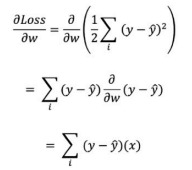

* 그래디언트는 가중치 w에 대한 편도함수를 말하며 다음과 같이 정의할 수 있음.
$\triangle w =  \sum_{i}^{} (y - \hat{y})(x)$
* 그래디언트 w 업데이트 최종 수식은 다음과 같이 정의할 수 있음.

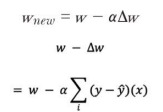

* 손실함수 b에 대한 편도함수

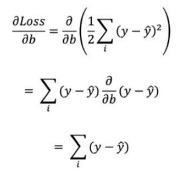

* 그래디언트 b 업데이트 최종 수식

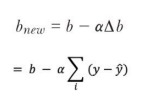

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random한 값으로 w, b를 초기화
w = np.random.uniform(low = 0.0, high = 1.0)
b = np.random.uniform(low = 0.0, high = 1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat - y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y) * x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2}w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("-----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0w = 0.11934, b = 0.35157 error = 5.39285
 5w = 0.28344, b = 0.48757 error = 0.22788
10w = 0.29976, b = 0.50104 error = 0.17692
15w = 0.30138, b = 0.50238 error = 0.17641
20w = 0.30155, b = 0.50252 error = 0.17641
25w = 0.30156, b = 0.50253 error = 0.17641
30w = 0.30156, b = 0.50253 error = 0.17641
35w = 0.30156, b = 0.50253 error = 0.17641
40w = 0.30156, b = 0.50253 error = 0.17641
45w = 0.30156, b = 0.50253 error = 0.17641
50w = 0.30156, b = 0.50253 error = 0.17641
55w = 0.30156, b = 0.50253 error = 0.17641
60w = 0.30156, b = 0.50253 error = 0.17641
65w = 0.30156, b = 0.50253 error = 0.17641
70w = 0.30156, b = 0.50253 error = 0.17641
75w = 0.30156, b = 0.50253 error = 0.17641
80w = 0.30156, b = 0.50253 error = 0.17641
85w = 0.30156, b = 0.50253 error = 0.17641
90w = 0.30156, b = 0.50253 error = 0.17641
95w = 0.30156, b = 0.50253 error = 0.17641
100w = 0.30156, b = 0.50253 error = 0.17641
105w = 0.30156, b = 0.50253 error = 0.17641
110w = 0.30156, b = 0.50253 error = 0.17641
115w = 0

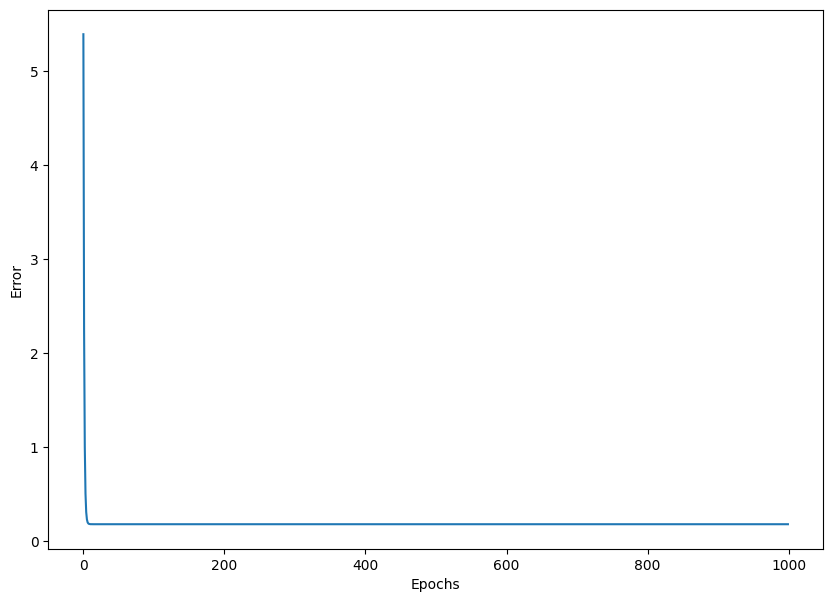

In [4]:
plt.figure(figsize = (10, 7))
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

* 가중치가 난수 값에 의하여 다르게 초기화되기 때문에 매번 실행할 때마다 수렴하는 속도는 차이가 있음.
* 하지만 결국 목표하는 오차 범위 안으로 수렴하여 반복문을 종료하게 되고, 종료 후 w, b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w, b와 비슷한 값임을 확인할 수 있음.

## 1-2 딥러닝 프로세스
* 딥러닝 모델 구축 및 훈련을 위해서는 다음과 같은 프로세스를 따름

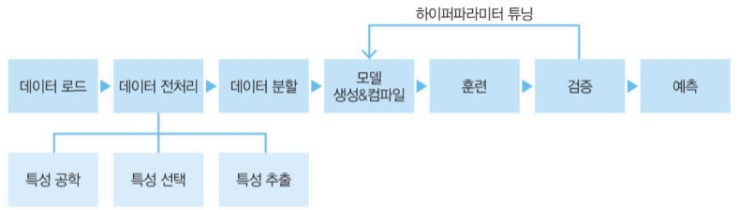

* 데이터 전처리, 모델의 생성, 컴파일, 훈련은 모델의 훈련을 위한 필수 프로세스로 누락되는 단계는 없음.
* 예측: 예측용 데이터셋을 입력하여 모델 예측 값을 얻는 과정
* 검증: 모델의 성능을 평가하는 단계

### 1-2-1 데이터 전처리
* 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계. 데이터셋의 종류와 적용하려는 문제 유형에 따라 전처리 방법은 다양함.
* 때에 따라서는 배열의 차원을 변경하거나 스케일을 조정할 수 있음.
* 전처리 단계에서 데이터셋의 형태나 차원을 미리 구상해야 다음 단계에서 모델을 설계할 때 입력할 데이터셋의 형태를 올바르게 정의할 수 있음.
* 전처리 단계에서 처리한 데이터셋의 형태와 다음 단계에서 생성할 모델이 입력받을 데이터셋의 형태가 다르다면 에러가 발생할 수 있음.

### 1-2-2 모델 생성
* 모델의 구조를 정의하고 생성하는 단계
* 모델을 생성하는 방법은 크게 세 가지로 구분할 수 있으며, 순차적인 구조의 모델은 Sequential API로 구현
* 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델은 Functional API 혹은 Model Subclassing 방법으로 구현

### 1-2-3 모델 컴파일
* 딥러닝 모델의 구조를 정의하고 생성한 뒤에는, 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의
* 모델 인스턴스에 compile() 메소드를 적용하고, 앞에서 열거한 여러 속성 값을 설정

### 1-2-4 모델 훈련
* 모델을 훈련하는 단계
* fit() 함수에 모델 훈련에 필요한 정보를 매개변수로 전달
* 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등을 저장

### 1-2-5 모델 검증
* 훈련이 완료된 모델을 검증하는 단계
* 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산
* 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이뤄짐
* 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고, 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 때까지 이 과정을 계속 반복

### 1-2-6 모델 예측
* 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환

# 02. 단순 신경망 훈련

## 2-1 선형회귀
* 회귀 분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법
* 단순선형회귀: 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있음. $y = ax + b$
* 1차 함수식의 X는 독립변수, Y는 종속변수. a는 기울기, b는 절편.
* 기울기 a는 일차 함수 그래프의 기울기를 결정하고 절편 b는 그래프의 높낮이를 결정

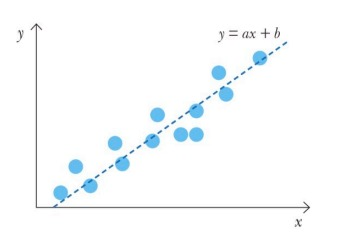

* 텐서플로 케라스를 활용하여 단순선형회귀 모델을 직접 만들고 딥러닝을 학습할 때, 모델은 1차 함수식과 동일하다고 생각
* 모델의 기울기 a와 절편 b를 업데이터하면서 종속변수 Y에 가장 근사한 1차 함수식을 완성해 나감
* 딥러닝에서는 기울기 a 대신 가중치를 의미하는 w를 더 많이 사용. $y = wx + b$
* w는 가중치의 w이고, b는 편향의 b를 나타냄

## 2-2 뉴런
* 뉴런: 인공 신경망 모델을 구성하는 하나의 신경
* 노드라고도 불리우고 같은 의미를 가지며 혼용하여 사용
* 신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨
* 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨.

## 2-3 Dense 레이어
* Dense 레이어: 심층 신경망 모델을 구성하는 가장 기본 레이어
* 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층이라고 부르기도 함.

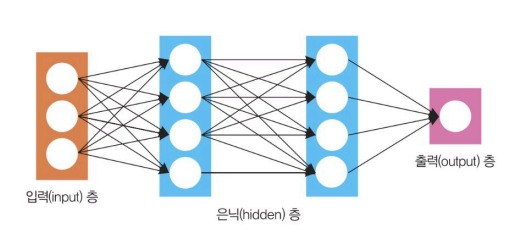
* 4개의 Dense 레이어로 구성된 모델을 나타냄
* 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개로 구성
* 각 레이어는 1개 이상의 뉴런으로 구성
* 입력 레이어에는 3개의 뉴런이 있고, 출력 레이어는 1개의 뉴런을 가짐.
* 모든 뉴런들이 정보의 흐름을 나타내는 화살표로 연결되어 있어서 완결연결층이라고 정의
>
* Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정할 수 있음.
* 텐서플로의 layer 모듈에 있는 Dense 레이어로 쉽게 구현할 수 있음.

In [5]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation = "relu")

## 2-4 데이터셋 만들기
* 단순선형회귀 모델을 지도학습 방식으로 훈련하기 위해 x, y 데이터를 생성

In [6]:
# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


* 생성한 데이터를 matplotlib 시각화 라이브러리를 활용하여 그래프를 출력

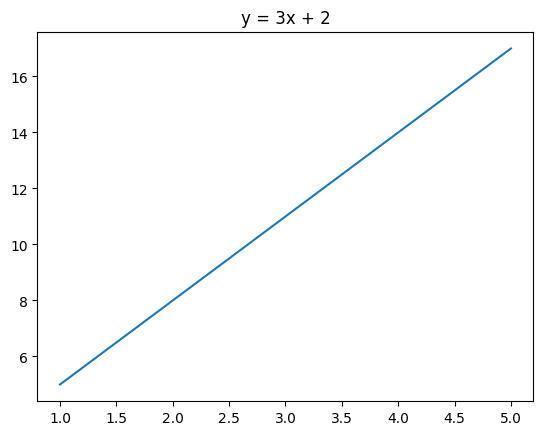

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title("y = 3x + 2")
plt.show()

## 2-5 Sequential API
* 케라스의 Sequential API 방식은 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식. 따라서, 입력 레이어부터 출력 레이어까지 순서를 갖음.
* 입력데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 유행을 수행

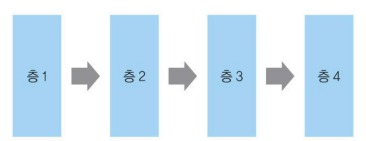

* 이처럼 직관적으로 구조를 이해할 수 있기 때문에, 케라스 모델을 생성하고 훈련하는 가장 간단한 방법이라고 말할 수 있음.
* 다만, 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다는 단점이 있음. 이런 경우 Functional API를 사용해야 함.

### 2-5-1 모델 구조
* Sequntial API를 사용하여 모델 생성 시 다음과 같은 두 가지 방법으로 모델을 구성할 수 있음.
* 리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력.
* 대괄호 안에 쉼표로 구분하여 층을 쌓음.
* 앞에 위치한 층부터 연산을 먼저 처리하고 순차적으로 다음 층의 연산을 수행하게 됨.

In [8]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

* add 함수로 레이어 추가로 Sequential 클래스 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가하는 방식
* add() 메소드 함수를 사용하여 1개의 층을 추가할 수 있음. 따라서 여러 개의 층을 추가하려면 add 함수를 반복해서 여러 번 사용해야 함.

In [9]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### 2-5-2 입력 데이터 형태
* Sequential API를 사용하여 모델을 구성할 때 반드시 첫 번째 층은 input_shape 매개변수를 지정해야 함
* input_shape 매개변수는 주입할 데이터셋의 shape을 투플 혹은 리스트로 지정할 수 있음.

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape = [4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

### 2-5-3 단순선형회귀 모델 정의
* 단순선형회귀 모델을 만들기 위해서는 1개의 뉴런을 가지는 Dense 레이어 한 개를 사용
* 여기에 정의한 1개의 뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 가짐
* 1차 함수식 $y = wx + b$에서 입력 데이터는 x값을 나타내는 입력 변수 1개만 존재하기 때문에 input_shape = [1]로 지정.
* 1개의 뉴런을 가지는 Dense 레이어는 1개의 출력 값을 가지므로, 출력 값은 y에 대한 모델의 예측 값

In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

## 2-6 모델 요약
* Sequential API로 모델을 만들었다면 model.summary()로 모델을 요약을 확인
* 모델의 요약 내용은 노트북 셀에서 출력 값으로 확인 가능. 모델의 구조를 확인할 수 있으며 층별 노드의 개수가 표기됨. 요약의 하단에는 훈련 시 업데이트할 파라미터의 개수가 표기됨.

In [12]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params: 모델 내부에 존재하는 모든 파라미터의 합계가 표기됨
* Trainable params: 모델 훈련 시 업데이트할 파라미터의 총 개수를 나타냄
* Non-trainable params: 훈련 시 업데이트하지 않을 파라미터의 총 개수를 나타냄
* 단순선형회귀 모델에서는 업데이트 파라미터가 가중치 w와 편향 b 두개이므로, 요약에서도 총 파라미터의 개수가 2개로 표기되는 것을 확인할 수 있음.

## 2-7 컴파일
* 컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 그리고 평가지표 등을 정의.
* 옵티마이저, 손실함수, 평가지표는 3가지 방법으로 지정할 수 있음. 클래스 인스턴스, 함수 혹은 사전 정의된 문자열.
* 클래스 인스턴스로 지정할 경우 학습률, 모멘텀 등의 하이퍼파라미터를 사용자가 직접 지정할 수 있음. 하지만 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용하며, 하이퍼파라미터 수정은 어렵다는 한계가 있음.

In [13]:
# 긴 문자열 지정
model.compile(optimizer = "sgd", loss = "mean_squared_error",
              metrics = ["mean_squared_error", "mean_absolute_error"])

In [14]:
# 짧은 문자열 지정
model.compile(optimizer = "sgd", loss = "mse", metrics = ["mse", "mae"])

In [15]:
# 클래스 인스턴스 지정
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.005),
               loss = tf.keras.losses.MeanAbsoluteError(),
               metrics = [tf.keras.metrics.MeanAbsoluteError(),
                          tf.keras.metrics.MeanSquaredError()
                          ])

* 앞에서 정의한 단순선형회귀 모델을 훈련시키기 위해서 옵티마이저는 확률적 경사하강법 알고리즘인 "sgd", 손실함수로는 평균제곱오차인 "mse", 평가지표는 평균절대오차인 "mae"를 지정

In [16]:
# 컴파일
model.compile(optimizer = "sgd", loss = "mse", metrics = ["mae"])

## 2-8 훈련
* 생성한 모델 인스턴스에 fit() 메소드를 적용하면, 데이터를 입력하여 모델을 훈련할 수 있음.
* fit() 메소드에서는 훈련용 데이터셋의 입력과 정답에 해당하는 출력, 그리고 반복 훈련할 epoch 수를 지정
* 매 epoch가 끝날 때마다 훈련 데이터세세 대한 손실과 평가지표를 출력
* verbose = 0 옵션을 지정하면, 이와 같은 훈련 중간 과정을 출력하지 않음
* fit() 메소드에 검증 데이터셋 옵션을 지정했다면 검증 셋에 대한 손실과 평가지표도 함께 출력

In [17]:
# 훈련
model.fit(x, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 630ms/step - loss: 191.8762 - mae: 12.8694
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 111.8799 - mae: 9.8608
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 65.2616 - mae: 7.5639
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 38.0944 - mae: 5.8104
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 22.2622 - mae: 4.4716


* 5 epoch의 훈련이 끝난 뒤 손실함수는 19.9488, 평균절대오차는 4.2472를 기록
* 컴파일 단계에서 손실함수로 평균제곱오차를 지정했기 때문에 19.9488는 평균제곱오차를 나타냄
* 매 epoch당 loss 값을 보면 171.6661에서 시작해서 19.9488까지 손실함수, 즉 모델의 예측 오차가 점점 줄어드는 것을 볼 수 있으며, 모델이 잘 학습되고 있는 것을 알 수 있음.
* 하지만 반복 훈련 횟수가 충분하지 않아 학습이 덜 되었다고 볼 수 있음.
* epoch를 늘려서 추가 학습을 하면 손실을 더욱 낮출 수 있을 것으로 보임. 즉, 모델은 현재 과소적합 상태.
* 이번에는 epoch를 1200을 지정하여 충분히 훈련할 수 있도록 함.

In [18]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# 컴파일
model.compile(optimizer = "sgd", loss = "mse", metrics = ["mae"])

# 훈련
history = model.fit(x, y, epochs = 1200)

Epoch 1/1200
1/1 [==============================] - 0s 346ms/step - loss: 90.9764 - mae: 8.9567
Epoch 2/1200
1/1 [==============================] - 0s 11ms/step - loss: 53.1354 - mae: 6.8871
Epoch 3/1200
1/1 [==============================] - 0s 10ms/step - loss: 31.0827 - mae: 5.3070
Epoch 4/1200
1/1 [==============================] - 0s 16ms/step - loss: 18.2306 - mae: 4.1007
Epoch 5/1200
1/1 [==============================] - 0s 14ms/step - loss: 10.7403 - mae: 3.1796
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 6.3746 - mae: 2.4763
Epoch 7/1200
1/1 [==============================] - 0s 11ms/step - loss: 3.8296 - mae: 1.9392
Epoch 8/1200
1/1 [==============================] - 0s 11ms/step - loss: 2.3458 - mae: 1.5291
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.4803 - mae: 1.2158
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.9752 - mae: 0.9765
Epoch 11/1200
1/1 [==============================] - 

* 충분한 epoch 동안 훈련한 후 mse, mae 모두 개선되었음을 확인할 수 있음.
* 훈련에 대한 결과가 지정된 history 변수를 사용하여 epoch별 훈련 손실 및 평가지표를 시각화

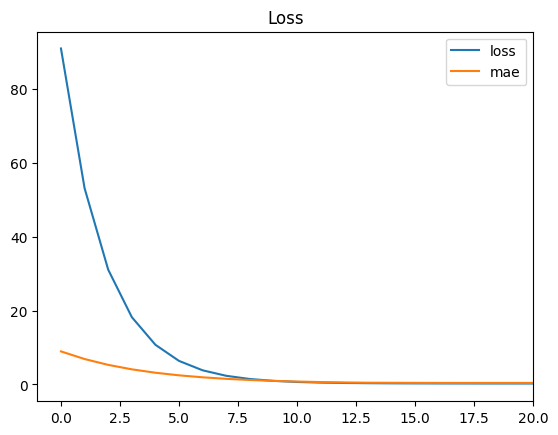

In [19]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["mae"], label = "mae")
plt.xlim(-1, 20)
plt.title("Loss")
plt.legend()
plt.show()

* 첫 10 epoch까지 손실이 급격히 감소하는 것을 확인할 수 있음. 10 epoch를 넘어가면 감소 폭이 둔화되면서 조금씩 감소하는 것을 확인할 수 있음.
* 즉, 모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가 일정 epcoh 이후에는 학습 속도가 느려지는 패턴을 보임

## 2-9 검증
* 모델 인스턴스의 evaluate() 메소드로 모델의 성능을 검증할 수 있음. 일반적으로 검증 데이터셋을 입력하여 검증.
* 별도의 검증 셋을 만들어 두지 않았으므로 훈련 데이터셋의 x, y를 대입하여 반환되는 결과를 확인

In [20]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 303ms/step - loss: 8.5416e-05 - mae: 0.0079


[8.54156824061647e-05, 0.007932757958769798]

* 두 개의 지표 loss: 5.0254e-05 - mae: 0.0061가 출력되며 모델의 검증 결과를 보여줌. 모델 훈련 단계에서 1,200번 epoch를 종료한 상태에서 출력된 값과 같음.
* 검증 단계에서는 모델이 훈련을 마친 상태의 가중치를 그대로 적용하여 손실과 평가지표를 계산하기 때문.

## 2-10 예측
* 훈련이 완료된 모델 인스턴스의 predict() 메소드에 새로운 입력 데이터를 넣어 주면 모델의 예측 값을 얻을 수 있음.

In [21]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 391ms/step


array([[32.03834]], dtype=float32)

* 정답에 꽤 근사한 값을 예측함

# 03. 심층 심경망으로 이미지 분류
* 이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성
* 훈련에 필요한 데이터셋은 케라스 내장 데이터셋을 가져와 사용하며, 분류에 적합한 손실함수를 적용하고 결과를 확인

## 3-1 케라스 내장 데이터셋 로드
* 지원하는 목록
 * boston_housing: 보스톤 주택 가격 데이터셋 (회귀)
 * cifar10: CIFAR10 이미지 분류 데이터셋 (분류)
 * cifar100: CIFAR100 이미지 분류 데이터셋 (분류)
 * mnist: mnist: 손글씨 데이터셋 (분류)
 * fashion_mnist: 의류 데이터셋 (분류)
 * imdb: IMDb 영화 데이터셋 (분류)
 * reuters: Reuters 뉴스 토픽 (분류)

In [22]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

* mnist 변수에 load_data() 메소드를 적용하면 google의 storage로부터 넘파이 배열로 구성된 데이터셋을 다운받음.

In [33]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

* 훈련 셋에는 60,000개의 데이터가, 검증 셋에는 10,000개 데이터가 저장되어 있다는 것을 확인할 수 있음.
* 입력 데이터에 해당하는 x_train, x_test에는 mnist 손글씨 이미지 데이터가 저장되고, 배열이 shape은 (데이터셋 크기, 28, 28)라는 것을 알 수 있음.
* 즉, x_train에는 28 x 28 픽셀 크기의 정사각형 이미지 60,000장이 저장되어 있고, x_test에는 10,000장이 이미지가 저장되어 있는 것.
* 각 입력 데이터에 대응되는 출력 데이터 또한 각각 60,000개와 10,000개가 1차원 벡터 형태로 정리되어 있는 것을 알 수 있음

In [34]:
# 로드된 데이터셋 확인
print("train set: ", x_train.shape, y_train.shape)
print("test set: ", x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


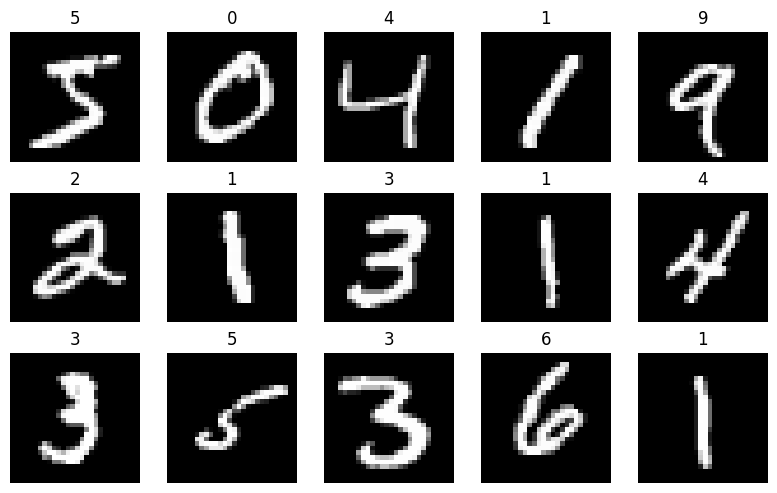

In [35]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i % 5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap = "gray")
  ax.axis("off")
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

* mnist 데이터셋은 사람의 필기체로 쓰인 0 ~ 9까지의 숫자들로 이루어진 데이터셋이며, 0 ~ 9까지 총 10개의 정답 레이블로 구성되어 있음.

## 3-2 데이터 전처리
* 이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절
* x_train은 넘파이 배열이며, 배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭됨

In [36]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

* 데이터가 0~255 범위의 값으로 이루어진 것을 확인할 수 있음.
* 데이터의 범위를 0~1 사이의 값을 가지도록 정규화하기 위해서는 데이터의 최댓값인 255로 나눔

In [37]:
# 픽셀 값의 최소/최대값 확인
print(f"정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}")

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f"정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}")

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


* 검증 셋에도 동일한 방식으로 정규화 방법을 적용

In [38]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [39]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

## 3-3 Flatten 레이어
* 정규화가 끝난 x_train의 shape는 (60000, 28, 28)로, 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지됨.
* 샘플 이미지의 형태는 (28, 28)로 이루어져 있고 2차원 입력으로 볼 수 있음.
* 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없고, 반드시 1차원 배열이 들어가야 함.
* 따라서 이미지 데이터를 1차원으로 전처리하여 주입

In [40]:
print(f"변경 전 shape: {x_train.shape}")
print(f"1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}")

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


* 또는 Flatten 레이어를 사용하여 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능

In [41]:
print(f"변경 전 shape: {x_train.shape}")

# Flatten 레이어 적용 후 shape 확인
print(f"Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}")

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


## 3-4 활성화 함수
* 활성화 함수: 입력을 비선형 출력으로 변환해주는 함수. 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 함.
* 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현됨.
* 자주 사용되는 활성화 함수로는 시그모이드, 하이퍼볼릭 탄젠트, ReLU, Leaky ReLU 등이 있음.

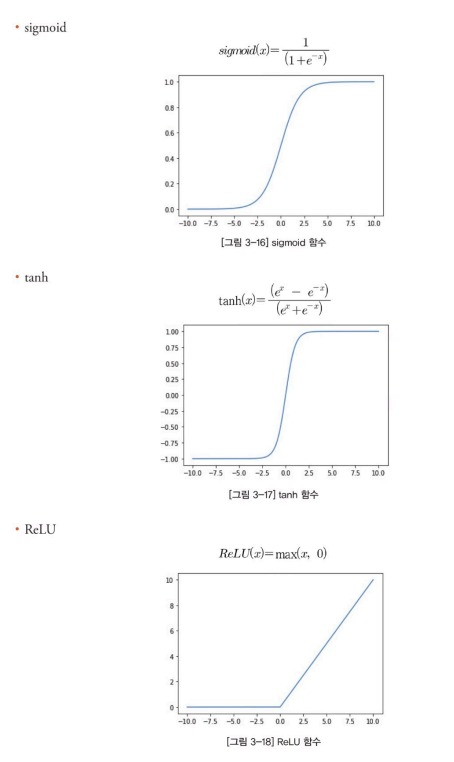
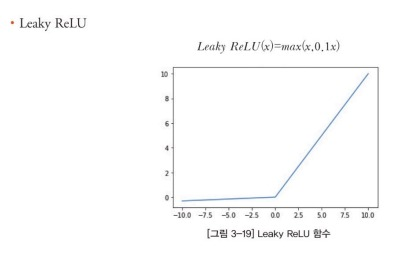

In [42]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation = "relu")

* 별도의 층처럼 적용할 수도 있음
* 이렇게 별도의 층으로 적용하는 경우는 Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용됨

In [43]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation("relu")
])

## 3-5 입력과 출력
* 딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적
* 앞의 train_shape에서 데이터셋의 크기를 나타내는 60000이라는 숫자를 제외하고 이미지의 세로, 가로 형태를 나타내는 input_shape = (28, 28)를 input_shape로 지정
* 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 함.
* mnist는 0~9까지 총 10개의 클래스로 이루어져 있기 때문에 마지막 출력층의 노드 개수는 10개가 되어야 함.

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    # 노드 = 10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation = "softmax"),
])

* 출력층의 노드 개수가 2개 이상이 경우는 softmax 활성화 함수를 적용
* 즉, 다중 분류 문제에서는 softmax 활성화 함수를 사용해야 함
* 반면, 이진 분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 sigmoid 활성화 함수를 적용 (단, 이진 분류 모델이라도 출력 레이어의 클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우에는 softmax 함수를 사용)

In [45]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation = "sigmoid")

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation = "softmax")

## 3-6 손실함수
* 분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련할 수 있음.

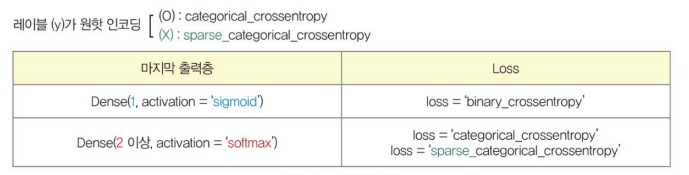

* 이진 분류기 생성 시 출력층의 노드 개수가 1개이면 activation = "sigmoid"를 지정하며 손실함수로는 "binary_crossentropy"를 지정

In [46]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss = "binary_crossentropy")

* 출력층의 노드 개수가 2개 이상일 경우 activation = "softmax"와 같이 softmax 활성화 함수를 지정하고, 손실함수는 "categorical_crossentropy" 혹은 "sparse_categorical_crossentropy"를 지정
* 출력 데이터가 원핫 벡터인 경우에는 "categorical_crossentropy"를 지정하고, 원핫 벡터가 아닌 경우에는 "sparse_categorical_crossentropy"를 지정

In [47]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,]
model.compile(loss = "categorical_crossentropy")
# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss = "sparse_categorical_crossentropy")

* mnist 손글씨 데이터셋은 클래스의 개수가 10개이므로 마지막 출력층에 해당하는 Dense 레이어의 노드 개수를 10으로 지정
* 출력 데이터가 원핫 벡터가 아니고, 0~9까지 레이블 값을 갖기 때문에 손실함수로 "sparse_categorical_crossentropy"

## 3-7 옵티마이저
* 옵티마이저: 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법
* 일반적으로 많이 사용되는 알고리즘은 Adam이며 대체적으로 좋은 성능을 발휘하는 것으로 알려져 있음.
* 케라스에서 지원하는 옵티마이저 목록
 * SGD
 * Adam
 * Adagrad
 * Nadam
 * RMSprop
 * Adadelta
 * Adamax
 * Ftrl


In [49]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = adam)

# 문자열로 지정
model.compile(optimizer = "adam")

## 3-8 평가지표
* 분류 모델에 대한 평가지표는 정확도를 나타내는 "accuracy"가 가장 많이 사용되며 "auc", "precision", "recall" 등의 지표도 많이 사용됨.
* 모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고할 수 있음.
* 평가지표도 옵티마이저와 마찬가지로 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있음.

In [50]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = [acc])

In [51]:
# 문자열로 지정
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

## 3-9 훈련
* 앞서 선형회귀 모델을 학습시킬 때는 별도의 검증 데이터셋을 만들지 않음.
* 한편, mnist 손글씨 데이터셋은 10,000개로 구성된 별도의 검증 셋이 존재함. 우리는 거증 셋을 (x_test, y_test)에 저장.
* 모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 그리고 각 셋에 대한 평가지표를 나란히 출력
* 검증 셋을 지정하는 방법은 validation_data 매개변수에 튜플 형식의 검증 셋을 지정해주면 됨.

In [52]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2242 - accuracy: 0.9332 - val_loss: 0.1095 - val_accuracy: 0.9679
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0906 - accuracy: 0.9717 - val_loss: 0.1006 - val_accuracy: 0.9683
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0640 - accuracy: 0.9793 - val_loss: 0.0805 - val_accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0504 - accuracy: 0.9843 - val_loss: 0.0831 - val_accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0963 - val_accuracy: 0.9748
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0841 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.0808 - va

# 3-10 평가
* 10회의 epoch가 끝나고 훈련이 종료된 뒤 evaluate() 메소드로 모델 성능을 검증하고 평가 결과를 확인할 수 있음.
* 이때 검증 셋인 x_test, y_test를 함수에 전달

In [55]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print("검증 셋 정확도: ", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1001 - accuracy: 0.9777
검증 셋 정확도:  0.9776999950408936


* evaluate() 메소드는 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환하며, 그 중 정확도만 따로 지정하여 출력

## 3-11 예측
* 훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업을 수행할 수 있음.
* predict() 메소드에 이미지 데이터를 넣어주면 모델의 예측 결과를 반환
* 여기서는 예측에 필요한 새로운 데이터셋이 준비되어 있지 않기 때문에, 검증 데이터셋의 입력 데이터인 x_test를 사용

In [56]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


* predictions 변수에 모델이 예측한 분류 결과를 넘파이 배열 형태로 저장
* 첫 번째 입력 이미지에 대한 분류 결과를 출력해보면 10개의 확률값들이 출력되는 것을 확인할 수 있음.

In [57]:
# 예측 결과 출력
predictions[0]

array([1.3402692e-09, 2.8681225e-07, 2.2864572e-07, 9.2028571e-09,
       6.7664643e-09, 1.1459968e-10, 3.1384244e-14, 9.9999601e-01,
       6.3033021e-08, 3.4317882e-06], dtype=float32)

* 모델의 마지막 출력층의 노드 개수가 10개로 지정되었기 때문에 10개의 값이 출력된 것
* softmax 활성화 함수를 거친 10개의 출력 값은 순차적으로 0~9 까지의 10개의 개별 클래스에 대한 분류 확률값을 나타냄.
* 이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스. 넘파이 배열의 argmax를 활용하여 가장 높은 확률값을 가지는 클래스 결과를 확인할 수 있음.

In [58]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis = 1))

7
[7 2 1 0 4 1 4 9 5 9]


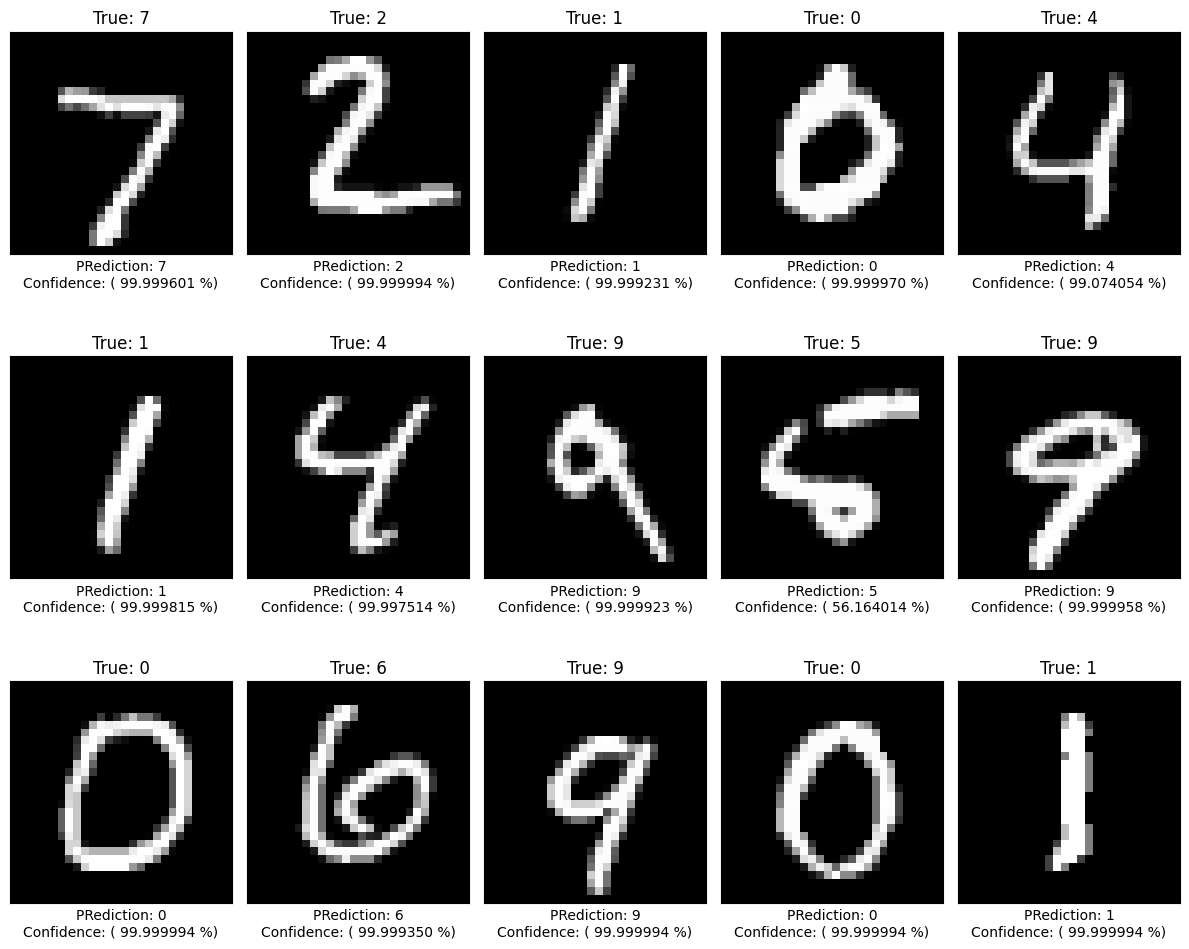

In [60]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i // 5, i % 5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap = "gray")
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f"True: {y_true}")
  ax.set_xlabel(f"PRediction: {y_pred}\nConfidence: ({confidence: 2f} %)")
plt.tight_layout()
plt.show()